In [17]:
# The purpose of this notebook is to take abalone data from the UCI database, and predict the age of the abalone (number of rings).

In [18]:
# Basic plan of action:
# Import data
# Inspect and explore data,
# Clean data, removing features we dn't need, removing outliers, removing nulls, etc,
# visualize
# Fit the model.
# Train/test split.
# Scale.
# Get Betas and interpret.

In [19]:
# Also to do:
# Compare your work to https://medium.com/swlh/abalone-sex-classification-via-physical-measurements-r-3b72526d5326

# Also, follow all the Andy Field stats steps (like Smirnov test,etc)

In [20]:
# Predictor Variable details

# Sex / nominal / -- / M, F, and I (infant)
# Length / continuous / mm / Longest shell measurement
# Diameter / continuous / mm / perpendicular to length
# Height / continuous / mm / with meat in shell
# Whole weight / continuous / grams / whole abalone
# Shucked weight / continuous / grams / weight of meat
# Viscera weight / continuous / grams / gut weight (after bleeding)
# Shell weight / continuous / grams / after being dried

# Target variable:
#
# Rings / integer / -- / +1.5 gives the age in years

In [21]:
from pandas_profiling import ProfileReport
%run fbsource/fbcode/data_ai/data_discovery/data_clean_and_prep/data_clean_and_prep_api.py



In [22]:
# Dataset url: 
# Rings / integer / -- / +1.5 gives the age in years

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# import the abalone dataset 

abalone_data = pd.read_csv("/home/corbiep/local/abalone.data", names=["Sex", "Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight", "Rings"])

In [25]:
abalone_data.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [26]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [27]:
abalone_data.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [28]:
# How many of each?

abalone_data["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [29]:
# Check for 
# If there are nulls, use isnull().sum() and splicing using isnull (ex: cr_data[pd.isnull(cr_data["Ring 0 MSR"])]), to find and explore, and dropna() to remove

abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

In [30]:
# Spot checking by hand

abalone_data.iloc[100:110, :]

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
100,I,0.360,0.265,0.095,0.2315,0.1050,0.0460,0.075,7
101,M,0.550,0.435,0.145,0.8430,0.3280,0.1915,0.255,15
102,M,0.530,0.435,0.160,0.8830,0.3160,0.1640,0.335,15
103,M,0.530,0.415,0.140,0.7240,0.3105,0.1675,0.205,10
104,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12
105,F,0.520,0.410,0.155,0.7270,0.2910,0.1835,0.235,12
106,F,0.545,0.430,0.165,0.8020,0.2935,0.1830,0.280,11
107,F,0.500,0.400,0.125,0.6675,0.2610,0.1315,0.220,10
108,F,0.510,0.390,0.135,0.6335,0.2310,0.1790,0.200,9
109,F,0.435,0.395,0.105,0.3635,0.1360,0.0980,0.130,9


In [31]:
abalone_data.std()

Length            0.120093
Diameter          0.099240
Height            0.041827
Whole Weight      0.490389
Shucked Weight    0.221963
Viscera Weight    0.109614
Shell Weight      0.139203
Rings             3.224169
dtype: float64

In [32]:
# Remove outliers

In [33]:
Length_outlier = abalone_data["Length"].mean() + (abalone_data["Length"].std() * 2.5)
Diameter_outlier = abalone_data["Diameter"].mean() + (abalone_data["Diameter"].std() * 2.5)
Height_outlier = abalone_data["Height"].mean() + (abalone_data["Height"].std() * 2.5)
Whole_Weight_outlier = abalone_data["Whole Weight"].mean() + (abalone_data["Whole Weight"].std() * 2.5)
Shucked_Weight_outlier = abalone_data["Shucked Weight"].mean() + (abalone_data["Shucked Weight"].std() * 2.5)
Viscera_Weight_outlier = abalone_data["Viscera Weight"].mean() + (abalone_data["Viscera Weight"].std() * 2.5)
Shell_Weight_outlier = abalone_data["Shell Weight"].mean() + (abalone_data["Shell Weight"].std() * 2.5)

Rings_outlier = abalone_data["Rings"].mean() + (abalone_data["Rings"].std() * 2.5)



In [34]:
print(Length_outlier) #sanity check

0.8242243810050083


In [35]:
abalone_data.info()

# There are 4177 before outlier removal. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [36]:
abalone_data = abalone_data.loc[abalone_data["Length"] < Length_outlier]

In [37]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.3+ KB


In [38]:
abalone_data = abalone_data.loc[abalone_data["Diameter"] < Diameter_outlier] # There is probably a most efficient way of doing this
abalone_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.3+ KB


In [39]:
abalone_data = abalone_data.loc[abalone_data["Height"] < Height_outlier] 
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4172 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4172 non-null   object 
 1   Length          4172 non-null   float64
 2   Diameter        4172 non-null   float64
 3   Height          4172 non-null   float64
 4   Whole Weight    4172 non-null   float64
 5   Shucked Weight  4172 non-null   float64
 6   Viscera Weight  4172 non-null   float64
 7   Shell Weight    4172 non-null   float64
 8   Rings           4172 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 325.9+ KB


In [40]:
abalone_data = abalone_data.loc[abalone_data["Whole Weight"] < Whole_Weight_outlier] 
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4112 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4112 non-null   object 
 1   Length          4112 non-null   float64
 2   Diameter        4112 non-null   float64
 3   Height          4112 non-null   float64
 4   Whole Weight    4112 non-null   float64
 5   Shucked Weight  4112 non-null   float64
 6   Viscera Weight  4112 non-null   float64
 7   Shell Weight    4112 non-null   float64
 8   Rings           4112 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 321.2+ KB


In [41]:
abalone_data = abalone_data.loc[abalone_data["Shucked Weight"] < Shucked_Weight_outlier] 
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4091 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4091 non-null   object 
 1   Length          4091 non-null   float64
 2   Diameter        4091 non-null   float64
 3   Height          4091 non-null   float64
 4   Whole Weight    4091 non-null   float64
 5   Shucked Weight  4091 non-null   float64
 6   Viscera Weight  4091 non-null   float64
 7   Shell Weight    4091 non-null   float64
 8   Rings           4091 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 319.6+ KB


In [42]:
abalone_data = abalone_data.loc[abalone_data["Viscera Weight"] < Viscera_Weight_outlier] 
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4071 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4071 non-null   object 
 1   Length          4071 non-null   float64
 2   Diameter        4071 non-null   float64
 3   Height          4071 non-null   float64
 4   Whole Weight    4071 non-null   float64
 5   Shucked Weight  4071 non-null   float64
 6   Viscera Weight  4071 non-null   float64
 7   Shell Weight    4071 non-null   float64
 8   Rings           4071 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 318.0+ KB


In [43]:
abalone_data = abalone_data.loc[abalone_data["Shell Weight"] < Shell_Weight_outlier] 
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4043 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4043 non-null   object 
 1   Length          4043 non-null   float64
 2   Diameter        4043 non-null   float64
 3   Height          4043 non-null   float64
 4   Whole Weight    4043 non-null   float64
 5   Shucked Weight  4043 non-null   float64
 6   Viscera Weight  4043 non-null   float64
 7   Shell Weight    4043 non-null   float64
 8   Rings           4043 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 315.9+ KB


In [44]:
abalone_data = abalone_data.loc[abalone_data["Rings"] < Rings_outlier] 
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3921 non-null   object 
 1   Length          3921 non-null   float64
 2   Diameter        3921 non-null   float64
 3   Height          3921 non-null   float64
 4   Whole Weight    3921 non-null   float64
 5   Shucked Weight  3921 non-null   float64
 6   Viscera Weight  3921 non-null   float64
 7   Shell Weight    3921 non-null   float64
 8   Rings           3921 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 306.3+ KB


In [45]:
(4177-3921)/4177

0.06128800574575054

In [46]:
# 6% of the data being outliers is not good, but manageable. Should be investigated more.

In [47]:
abalone_data.corr()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,1.000000,0.986450,0.896889,0.933813,0.909314,0.907411,0.915018,0.596237
Diameter,0.986450,1.000000,0.902887,0.934379,0.905288,0.904576,0.922958,0.613117
Height,0.896889,0.902887,1.000000,0.888870,0.841853,0.867910,0.895465,0.632464
Whole Weight,0.933813,0.934379,0.888870,1.000000,0.972608,0.967033,0.961259,0.566127
Shucked Weight,0.909314,0.905288,0.841853,0.972608,1.000000,0.931104,0.900039,0.465297
Viscera Weight,0.907411,0.904576,0.867910,0.967033,0.931104,1.000000,0.921241,0.545388
Shell Weight,0.915018,0.922958,0.895465,0.961259,0.900039,0.921241,1.000000,0.636860
Rings,0.596237,0.613117,0.632464,0.566127,0.465297,0.545388,0.636860,1.000000


In [48]:
# Here is where we should move all the graphs to.

# scatter_matrix is also excellent

I0128 131743.487 font_manager.py:1349] generated new fontManager


Text(0, 0.5, 'Whole Weight')

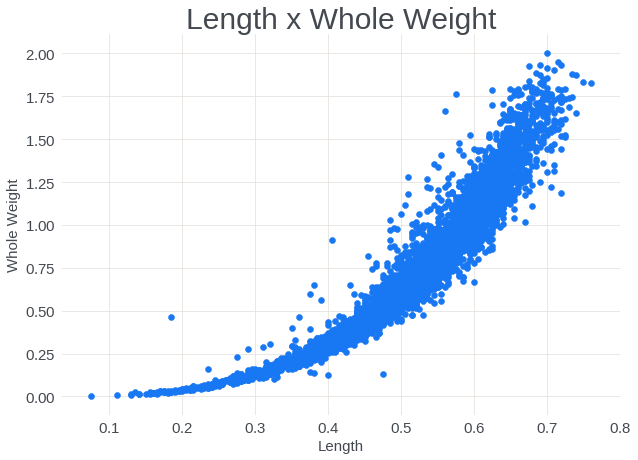

In [49]:
# Scatterplot for Lenght and Whole Weight
# You typically want to graph before cleaning and train test splitting, etc, but the more important graph would come at the end

fig = plt.figure(figsize=(10, 7))  # set figure size
plt.scatter(abalone_data["Length"], abalone_data["Whole Weight"])
plt.title("Length x Whole Weight")
plt.xlabel("Length")
plt.ylabel("Whole Weight")

Text(0, 0.5, 'Rings')

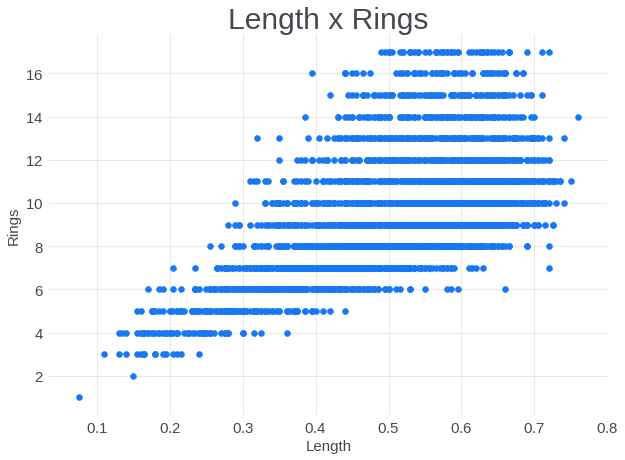

In [50]:
# Scatterplot for Length and Rings

fig = plt.figure(figsize=(10, 7))  # set figure size
plt.scatter(abalone_data["Length"], abalone_data["Rings"])
plt.title("Length x Rings")
plt.xlabel("Length")
plt.ylabel("Rings")

Text(0, 0.5, 'Rings')

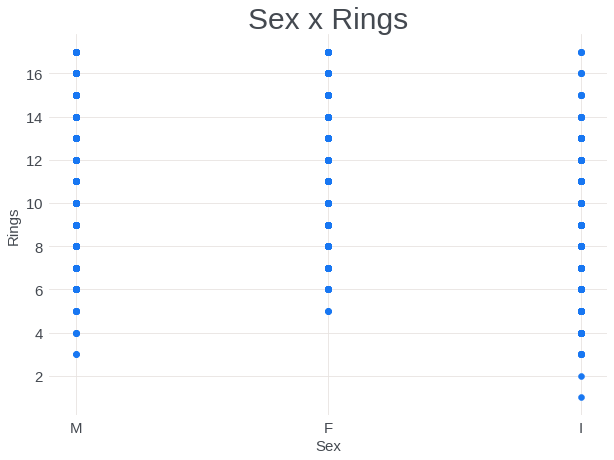

In [51]:
# Scatterplot for Sex and Rings

fig = plt.figure(figsize=(10, 7))  # set figure size
plt.scatter(abalone_data["Sex"], abalone_data["Rings"])
plt.title("Sex x Rings")
plt.xlabel("Sex")
plt.ylabel("Rings")

Text(0, 0.5, 'Rings')

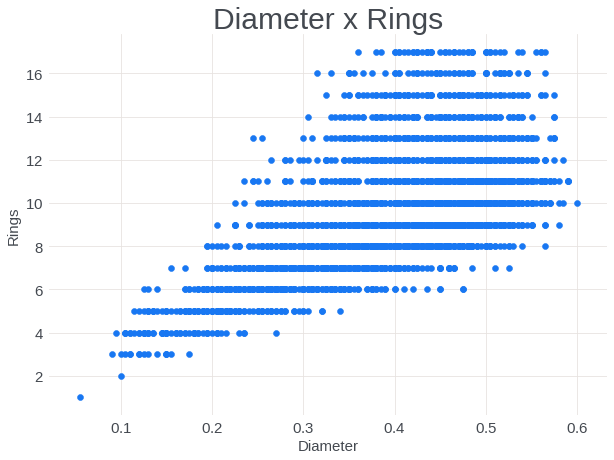

In [52]:
# Scatterplot for Diameter and Rings

fig = plt.figure(figsize=(10, 7))  # set figure size
plt.scatter(abalone_data["Diameter"], abalone_data["Rings"])
plt.title("Diameter x Rings")
plt.xlabel("Diameter")
plt.ylabel("Rings")

Text(0, 0.5, 'Rings')

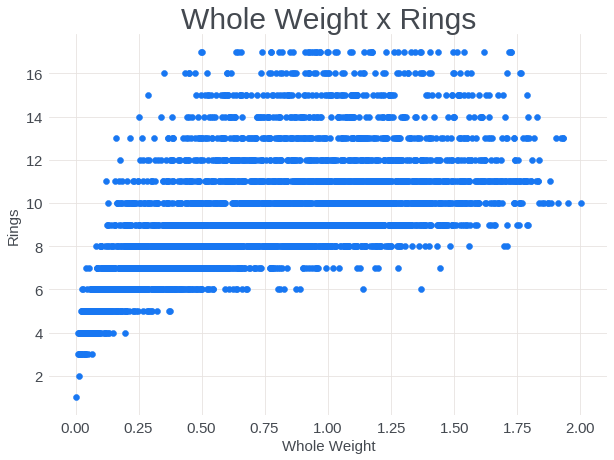

In [53]:
# Scatterplot for Whole Weight and Rings

fig = plt.figure(figsize=(10, 7))  # set figure size
plt.scatter(abalone_data["Whole Weight"], abalone_data["Rings"])
plt.title("Whole Weight x Rings")
plt.xlabel("Whole Weight")
plt.ylabel("Rings")

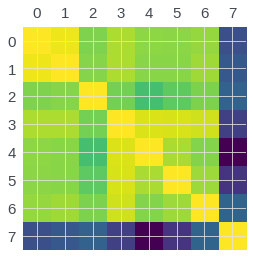

In [54]:
plt.matshow(abalone_data.corr())
plt.show()

In [55]:
abalone_data.corr()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,1.000000,0.986450,0.896889,0.933813,0.909314,0.907411,0.915018,0.596237
Diameter,0.986450,1.000000,0.902887,0.934379,0.905288,0.904576,0.922958,0.613117
Height,0.896889,0.902887,1.000000,0.888870,0.841853,0.867910,0.895465,0.632464
Whole Weight,0.933813,0.934379,0.888870,1.000000,0.972608,0.967033,0.961259,0.566127
Shucked Weight,0.909314,0.905288,0.841853,0.972608,1.000000,0.931104,0.900039,0.465297
Viscera Weight,0.907411,0.904576,0.867910,0.967033,0.931104,1.000000,0.921241,0.545388
Shell Weight,0.915018,0.922958,0.895465,0.961259,0.900039,0.921241,1.000000,0.636860
Rings,0.596237,0.613117,0.632464,0.566127,0.465297,0.545388,0.636860,1.000000


In [56]:
# train/test split

from sklearn.model_selection import train_test_split

abalone_data_train, abalone_data_test = train_test_split(abalone_data, test_size=0.25, random_state=18)

In [57]:
abalone_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 120 to 3605
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             2940 non-null   object 
 1   Length          2940 non-null   float64
 2   Diameter        2940 non-null   float64
 3   Height          2940 non-null   float64
 4   Whole Weight    2940 non-null   float64
 5   Shucked Weight  2940 non-null   float64
 6   Viscera Weight  2940 non-null   float64
 7   Shell Weight    2940 non-null   float64
 8   Rings           2940 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 229.7+ KB


In [58]:
abalone_data_train.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
120,F,0.470,0.365,0.105,0.4205,0.1630,0.1035,0.1400,9
3064,M,0.635,0.500,0.180,1.1540,0.4405,0.2315,0.3870,9
3343,F,0.455,0.365,0.110,0.3850,0.1660,0.0460,0.1345,13
2263,F,0.620,0.510,0.150,1.4560,0.5810,0.2875,0.3200,13
1112,F,0.520,0.460,0.150,1.0190,0.5230,0.1985,0.2540,7


In [59]:
# dummy encode the categorical variables

abalone_data_train = pd.get_dummies(abalone_data_train)
abalone_data_test = pd.get_dummies(abalone_data_test)

In [60]:
abalone_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 120 to 3605
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          2940 non-null   float64
 1   Diameter        2940 non-null   float64
 2   Height          2940 non-null   float64
 3   Whole Weight    2940 non-null   float64
 4   Shucked Weight  2940 non-null   float64
 5   Viscera Weight  2940 non-null   float64
 6   Shell Weight    2940 non-null   float64
 7   Rings           2940 non-null   int64  
 8   Sex_F           2940 non-null   uint8  
 9   Sex_I           2940 non-null   uint8  
 10  Sex_M           2940 non-null   uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 215.3 KB


In [61]:
abalone_data_test = abalone_data_test.reindex(columns = abalone_data_train.columns, fill_value = 0)
# get_dummies makes a new column for each case of categorical data, so it's likely to have a different number of columns in the test set and the training set. Use reindex to adjust the test set to have the same number of columns as the training set, removing unneeded columns. 


In [62]:
# Now scale. Consider other scaling options to increase accuracy

from sklearn.preprocessing import StandardScaler


In [63]:
# Move the target variable 'Rings' to the end
abalone_data_train = abalone_data_train[[c for c in abalone_data_train if c not in 'Rings'] + ['Rings']]

In [64]:
# create variables separating out the target variable from the others
X_train, y_train = abalone_data_train.iloc[:, :-1], abalone_data_train.iloc[:,[-1]]
X_test, y_test = abalone_data_test.iloc[:, :-1], abalone_data_test.iloc[:,[-1]]

In [82]:
X_train.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
120,0.470,0.365,0.105,0.4205,0.1630,0.1035,0.1400,1,0,0
3064,0.635,0.500,0.180,1.1540,0.4405,0.2315,0.3870,0,0,1
3343,0.455,0.365,0.110,0.3850,0.1660,0.0460,0.1345,1,0,0
2263,0.620,0.510,0.150,1.4560,0.5810,0.2875,0.3200,1,0,0
1112,0.520,0.460,0.150,1.0190,0.5230,0.1985,0.2540,1,0,0


/mnt/xarfuse/uid-20321/4cbaf2d2-seed-nspid4026533208_cgpid13400754-ns-4026533202/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


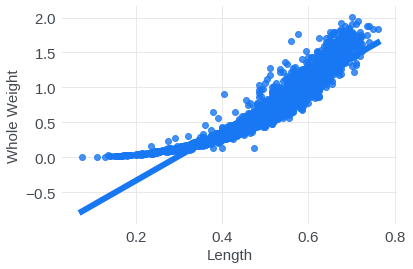

In [83]:
# Now make a scatterplot but with a regression line in it. This is easier to do it seaborn.

import seaborn as sns

# create scatterplot with regression line and confidence interval lines
# What is the standard way to present graphs? Do we present the training set only? Or both?
sns.regplot(X_train["Length"], X_train["Whole Weight"])

In [65]:
# instantiate the scaler
scaler = StandardScaler()

In [66]:
# fit and transform using the scaler
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)  # fit does the calculation to determine how the scaling should be done, and transform does the actual scaling. We want to transform without fitting on the test set to avoid data leakage.

In [67]:
# Instantiate the linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [69]:
# Fit
linreg.fit(rescaled_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# Assess accuracy
linreg.score(rescaled_X_train, y_train) #This is the training set score

0.5440229331495297

In [71]:
linreg.score(rescaled_X_test, y_test)  # This is the test set score

# Doesn't make sense

-626.5267547764214

In [ ]:
# check on optimization algorithm, cost function, and any other parameters that may need adjustment
# Would a transformation help?

In [ ]:
print(f'alpha = {model.intercept_}'). # Understand this code better. This is supposedly the intercept of the regression line. 

In [ ]:
print(f"betas = {model.coef_}")

In [ ]:
# Some ideas here: https://stackoverflow.com/questions/26951880/scikit-learn-linear-regression-how-to-get-coefficients-respective-features
# I am not sure if it's a problem that the above code uses 'X_train' as an argument. It shouldnt be, because it's just getting the column headers from X_train, and the coefficients are coming from 'model' which uses rescaled_X_train
coef_table = pd.DataFrame({"Feature": X_train.columns.tolist(), "Coefficients": model.coef_[0]})

coef_table


In [ ]:
# Check against general best practices for regresssion
#Mediation/moderation is important